In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dotenv import dotenv_values
from praire_data.funcs import get_gradebook, compare_grades, grades_and_time_by_student

config = dotenv_values("../.env")

In [2]:
TOKEN = config["TOKEN"]
course_instance_id = 168088

In [3]:
grades = get_gradebook(course_instance_id, TOKEN)

cols = ['user_id', 'user_name', 'points', 'max_points', 'score_perc', 'assessment_name', 'assessment_label', 'duration_seconds', 'assessment_set_abbreviation']
grades = grades.loc[grades['user_role'] == 'Student', cols]

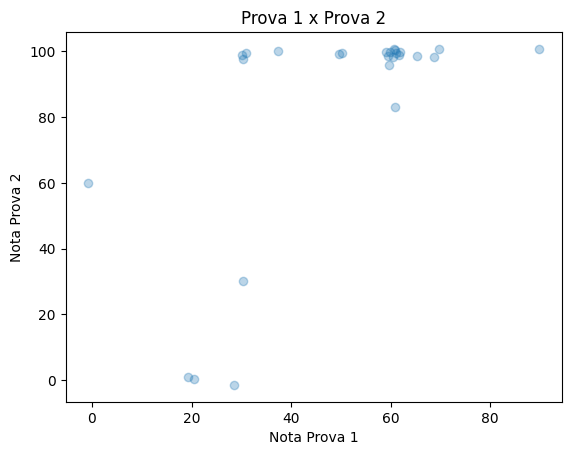

In [4]:
# NÃO FUNCIONA EM CONTEXTO GERAL, APENAS NESTE USO ESPECÍFICO

assessments = ['Provas1', 'Provas2']
compare_grades(grades, assessments)

In [5]:
assessments = ['CW1', 'CW2', 'Q1', 'Provas1'] + ['CW3', 'CW4', 'Q2', 'Provas2']

grades_and_time = grades_and_time_by_student(grades, assessments, by_assessment_type=False)
grades_and_time_by_type = grades_and_time_by_student(grades, assessments, by_assessment_type=True)

In [6]:
grades_and_time_by_type

,user_id,user_name,points%_CW,duration_seconds_CW,points%_Q,duration_seconds_Q,points%_Provas,duration_seconds_Provas
0,4497096,Gustavo Gomes,28.571429,403.770911,50.000000,882.479927,83.333333,6971.559202
1,4497904,Gabriel Pradyumna Alencar Costa,63.293651,1309.124450,100.000000,2157.188323,30.000000,2882.446572
2,4497907,Rafael Ken Reis Miyamoto,49.537037,2797.273943,89.444444,1207.187256,15.000000,5979.652345
3,4569792,Gabriel Moreira Alves da Silva,88.809524,4494.208063,0.000000,0.000000,60.000000,4400.341605
4,4569793,Helio Henrique Mudinuti Serra e Navarro,47.222222,3915.106136,50.000000,1061.269894,100.000000,5276.948116
5,4569794,Raphael Cimerman Lafer,60.317460,3502.384528,NaN,NaN,65.000000,7564.405417
6,4569795,Enzo Rios Perego,50.000000,1523.434675,NaN,NaN,80.000000,6438.097733
7,4569796,Cynthia Naoko Yasutake,49.206349,1460.464352,0.000000,0.000000,65.000000,10224.771947
8,4569797,Enzo Dell Oso,85.317460,2750.079975,100.000000,4513.542784,75.270833,9427.379957
9,4569798,Kauã Bernardo Correia,87.477954,4049.427514,0.000000,0.000000,80.000000,8437.764037


In [7]:
time_spent_exercises = np.sum(grades_and_time_by_type.loc[:, ['duration_seconds_CW', 'duration_seconds_Q']], axis=1) + \
                        np.random.randn(len(grades_and_time))

exam_grades = grades_and_time_by_type.loc[:, 'points%_Provas'] + np.random.randn(len(grades_and_time))

Text(0, 0.5, 'Grade on Exam')

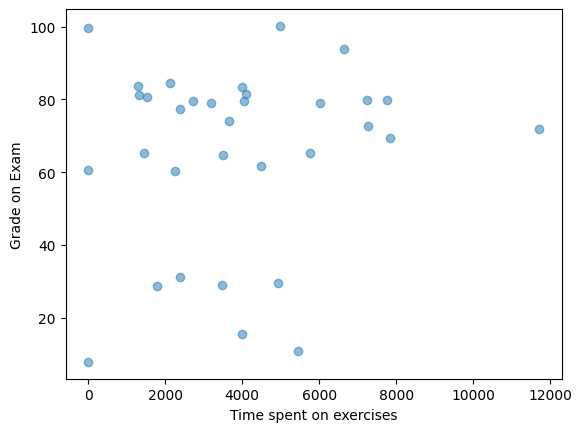

In [8]:
plt.scatter(time_spent_exercises, exam_grades, alpha=0.5)
plt.xlabel('Time spent on exercises')
plt.ylabel('Grade on Exam')